# Los Angeles Crime Data Analysis

Introduction: A subject with conversations about crime analysis in the city all over the planet. After some investigates to observe open information, I've chosen to investigate the information in Los Angeles city. Confined in the south of California, it's the subsequent more inhabited city in the United States (just behind New York), it's the focal point of the film and media business. Although crimes are committed at unexpected times, crime is a difficult topic for analytics and prediction, and therefore no actual crime prediction model could ever be as accurate as "Minority Report." Evaluating criminal background information to predict illegal acts could made in decreasing crime rates as well as preventing future losses. This crime report recommends the least and also most dangerous areas by evaluating the dataset.

# Objective:

To predict and classify the victim sex depending on the location,date,time,DR_NO,Area,crime code,vict age,The type of weapon used in the crime,vehicle, or location where the crime took place.

# Below are all the variables in the dataset, followed by its description:

DR_NO - Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.
    
DATE OCC - Date of crime occurrence(YYYY-MM-DD)

AREA - The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

AREA NAME - The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for.

Rpt Dist No - Code that represents a sub-area within a Geographic Area.

Crm Cd - Indicates the crime committed.

Crm Cd Desc - Defines the Crime Code provided.

Vict Age - Indicates the age of the victim.

Vict Sex - F: Female M: Male X: Unknown
            
Vict Descent - Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian
    
Premis Cd - The type of structure, vehicle, or location where the crime took place.

Premis Desc - Defines the Premise Code provided.

Weapon Used Cd - The type of weapon used in the crime.

Weapon Desc - Defines the Weapon Used Code provided.

LOCATION - Street address of crime incident rounded to the nearest hundred block to maintain anonymity.

LAT - Latitude Coordinate.

LON - Longitude Coordinate.

Reference:https://www.geeksforgeeks.org/how-to-skip-rows-while-reading-csv-file-using-pandas/?msclkid=1870ebdbcf2c11ec90c7edc7140eaab4

In [47]:
# importing libraries and file.

# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
import folium
!pip install squarify
import squarify

# dataset download link: https://catalog.data.gov/dataset/crime-data-from-2020-to-present

#import the dataset here I am taking only first 60341 rows from the dataset.
#df = pd.read_csv('Crime_Data_from_2020_to_Present.csv')
df=pd.read_csv('Crime_Data_from_2020_to_Present.csv',skipfooter = 300000,
                  engine = 'python')


df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
3,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
4,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60336,201606887,03/09/2020 12:00:00 AM,03/09/2020 12:00:00 AM,410,16,Foothill,1654,1,510,VEHICLE - STOLEN,...,IC,Invest Cont,510.0,NaN,NaN,NaN,12000 BRANFORD ST,NaN,34.2570,-118.3994
60337,200710432,06/13/2020 12:00:00 AM,06/08/2020 12:00:00 AM,800,7,Wilshire,777,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1600 BUCKINGHAM RD,NaN,34.0461,-118.3329
60338,200806428,02/24/2020 12:00:00 AM,02/24/2020 12:00:00 AM,35,8,West LA,881,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,EXPOSITION BL,BARRINGTON,34.0323,-118.4490
60339,201224666,11/17/2020 12:00:00 AM,11/17/2020 12:00:00 AM,830,12,77th Street,1248,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,6600 S VERMONT AV,NaN,33.9782,-118.2914


# Here we display the number of columns

In [48]:
df.columns #display columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [49]:
# Data Frame Volume and Data Types
print('Rows:\t{}'.format(df.shape[0]))
print('Variables:\t{}'.format(df.shape[1]))
df.dtypes

Rows:	60341
Variables:	28


DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

# Missing Values Percentage

In [50]:
(df.isnull().sum()).sort_values(ascending=False) / df.shape[0]

Crm Cd 4          0.999901
Crm Cd 3          0.997995
Crm Cd 2          0.920237
Cross Street      0.796556
Weapon Used Cd    0.598267
Weapon Desc       0.598267
Mocodes           0.127807
Vict Descent      0.123382
Vict Sex          0.123349
Premis Desc       0.000282
Crm Cd 1          0.000033
Premis Cd         0.000017
LAT               0.000000
LOCATION          0.000000
Status Desc       0.000000
Status            0.000000
DR_NO             0.000000
Date Rptd         0.000000
Vict Age          0.000000
Crm Cd Desc       0.000000
Crm Cd            0.000000
Part 1-2          0.000000
Rpt Dist No       0.000000
AREA NAME         0.000000
AREA              0.000000
TIME OCC          0.000000
DATE OCC          0.000000
LON               0.000000
dtype: float64

# Copying df to df1 before dropping unwanted columns

In [51]:
df1 = df

In [52]:
df1.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
3,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
4,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534


# Dropping the unwanted columns

In [53]:
df1.drop(['Crm Cd 4','Crm Cd 3','Crm Cd 2','Cross Street'],axis=1,inplace=True)

In [54]:
# removing blank values for 'Vict Descent', 'Vict Sex' and 'Premis Desc'
df1.dropna(subset=['Vict Descent', 'Vict Sex', 'Premis Desc'],inplace=True)
# adding the "N/A" text on blank values for 'Weapon Desc' and 'Weapon Used Cd'
df1.fillna(value='N/A')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,102.0,SIDEWALK,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",N/A,N/A,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
3,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,409.0,BEAUTY SUPPLY STORE,N/A,N/A,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468
4,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,121.0,700 S BROADWAY,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60335,201506322,02/17/2020 12:00:00 AM,01/29/2020 12:00:00 AM,1713,15,N Hollywood,1525,1,440,THEFT PLAIN - PETTY ($950 & UNDER),...,301.0,GAS STATION,N/A,N/A,IC,Invest Cont,440.0,11700 VICTORY BL,34.1867,-118.3878
60337,200710432,06/13/2020 12:00:00 AM,06/08/2020 12:00:00 AM,800,7,Wilshire,777,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,501.0,SINGLE FAMILY DWELLING,N/A,N/A,IC,Invest Cont,745.0,1600 BUCKINGHAM RD,34.0461,-118.3329
60338,200806428,02/24/2020 12:00:00 AM,02/24/2020 12:00:00 AM,35,8,West LA,881,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,102.0,SIDEWALK,N/A,N/A,IC,Invest Cont,745.0,EXPOSITION BL,34.0323,-118.4490
60339,201224666,11/17/2020 12:00:00 AM,11/17/2020 12:00:00 AM,830,12,77th Street,1248,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,203.0,OTHER BUSINESS,N/A,N/A,IC,Invest Cont,740.0,6600 S VERMONT AV,33.9782,-118.2914


# checking the statistical data for each column

In [55]:
# removing the values below one for the "Vict Age" column
df1.drop(df[df['Vict Age'] < 1].index, axis=0, inplace=True)

In [56]:
# checking the statistical data for vict age
df1.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,LAT,LON
count,4.572600e+04,45726.000000,45726.000000,45726.000000,45726.000000,45726.000000,45726.000000,45726.00000,22477.000000,45726.000000,45726.000000,45726.000000
mean,2.005484e+08,1343.938438,4.729847,521.088855,1.487688,516.471767,38.782268,314.27234,366.628999,516.138980,33.871808,-117.776031
std,1.332014e+06,652.231764,4.494638,448.499565,0.499854,225.238600,15.513199,218.32427,117.012619,224.980624,2.247754,7.806643
min,1.030447e+07,1.000000,1.000000,101.000000,1.000000,110.000000,2.000000,101.00000,101.000000,110.000000,0.000000,-118.659900
25%,2.002105e+08,915.000000,2.000000,238.000000,1.000000,330.000000,27.000000,102.00000,400.000000,330.000000,34.015500,-118.316000
50%,2.003193e+08,1425.000000,3.000000,393.000000,1.000000,480.000000,36.000000,210.00000,400.000000,480.000000,34.044400,-118.281400
75%,2.005155e+08,1900.000000,5.000000,564.000000,2.000000,664.000000,50.000000,502.00000,400.000000,662.000000,34.065500,-118.252600
max,2.121152e+08,2359.000000,21.000000,2197.000000,2.000000,956.000000,99.000000,971.00000,516.000000,956.000000,34.328900,0.000000


In [57]:
df1['Crm Cd Desc'].value_counts()

BATTERY - SIMPLE ASSAULT                                   5792
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             3762
BURGLARY FROM VEHICLE                                      3659
INTIMATE PARTNER - SIMPLE ASSAULT                          3434
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    2971
                                                           ... 
DISRUPT SCHOOL                                                1
FIREARMS RESTRAINING ORDER (FIREARMS RO)                      1
BIKE - ATTEMPTED STOLEN                                       1
DOCUMENT WORTHLESS ($200 & UNDER)                             1
LYNCHING - ATTEMPTED                                          1
Name: Crm Cd Desc, Length: 112, dtype: int64

# Here we plotting the major type of crimes in Los Angles

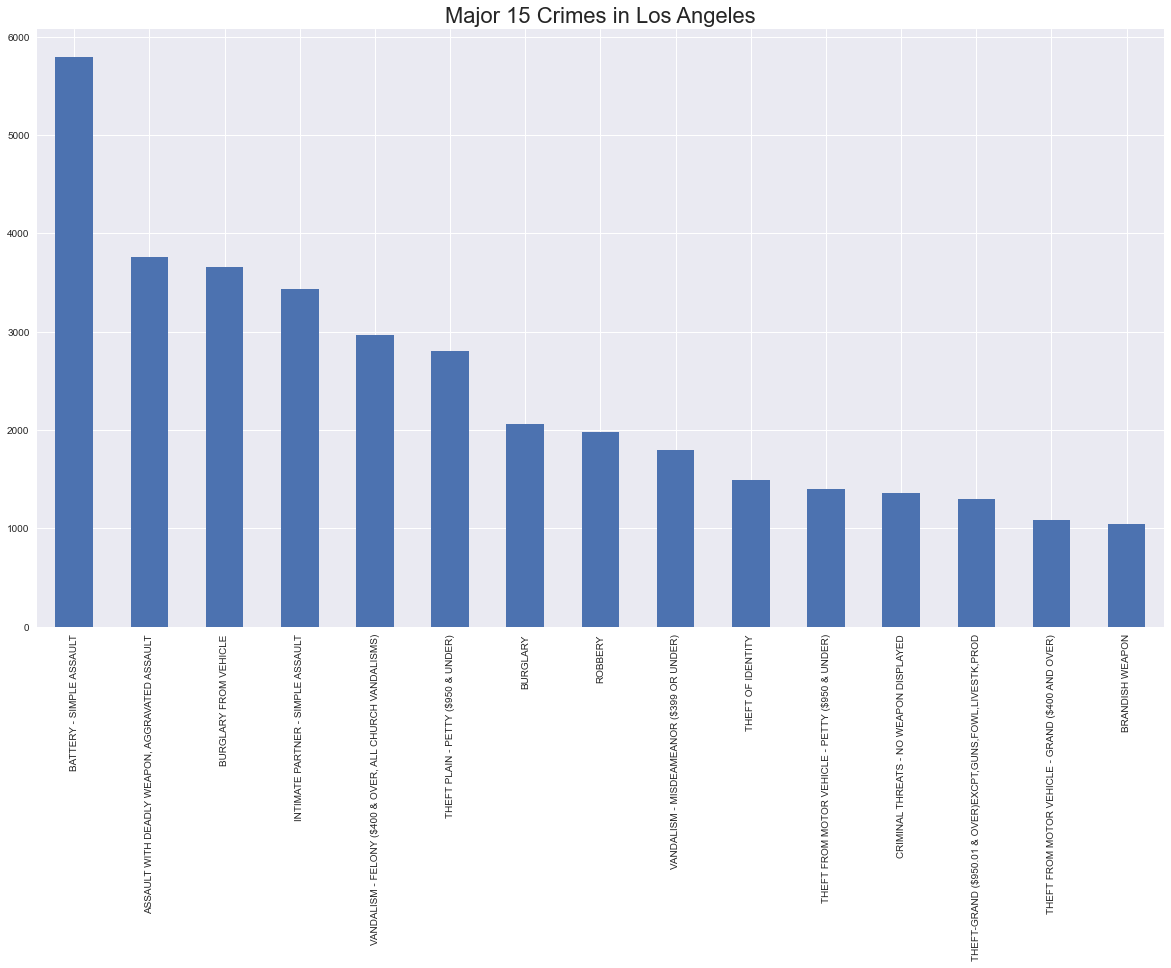

In [58]:
plt.rcParams['figure.figsize'] = (25, 10)
#sns.countplot(df['Crm Cd Desc'])
df1['Crm Cd Desc'].value_counts().head(15).plot.bar( figsize = (18, 11))
plt.title('Major 15 Crimes in Los Angeles', fontweight = 25, fontsize = 22)
plt.show()

With respect to crime carried out in the city of Los Angeles, five sorts have a more prominent unmistakable quality because of the quantity of events, among the violations perpetrated somewhere in the range of 2020 and 2021 the most successive are recorded:
    
Battery — Simple Assault, about 5800

Burglary from Vehicle, about 3600

Assault With Deadly Weapon, about 3700

Intimidate Partner, about 3400

Vandalism, about 2900

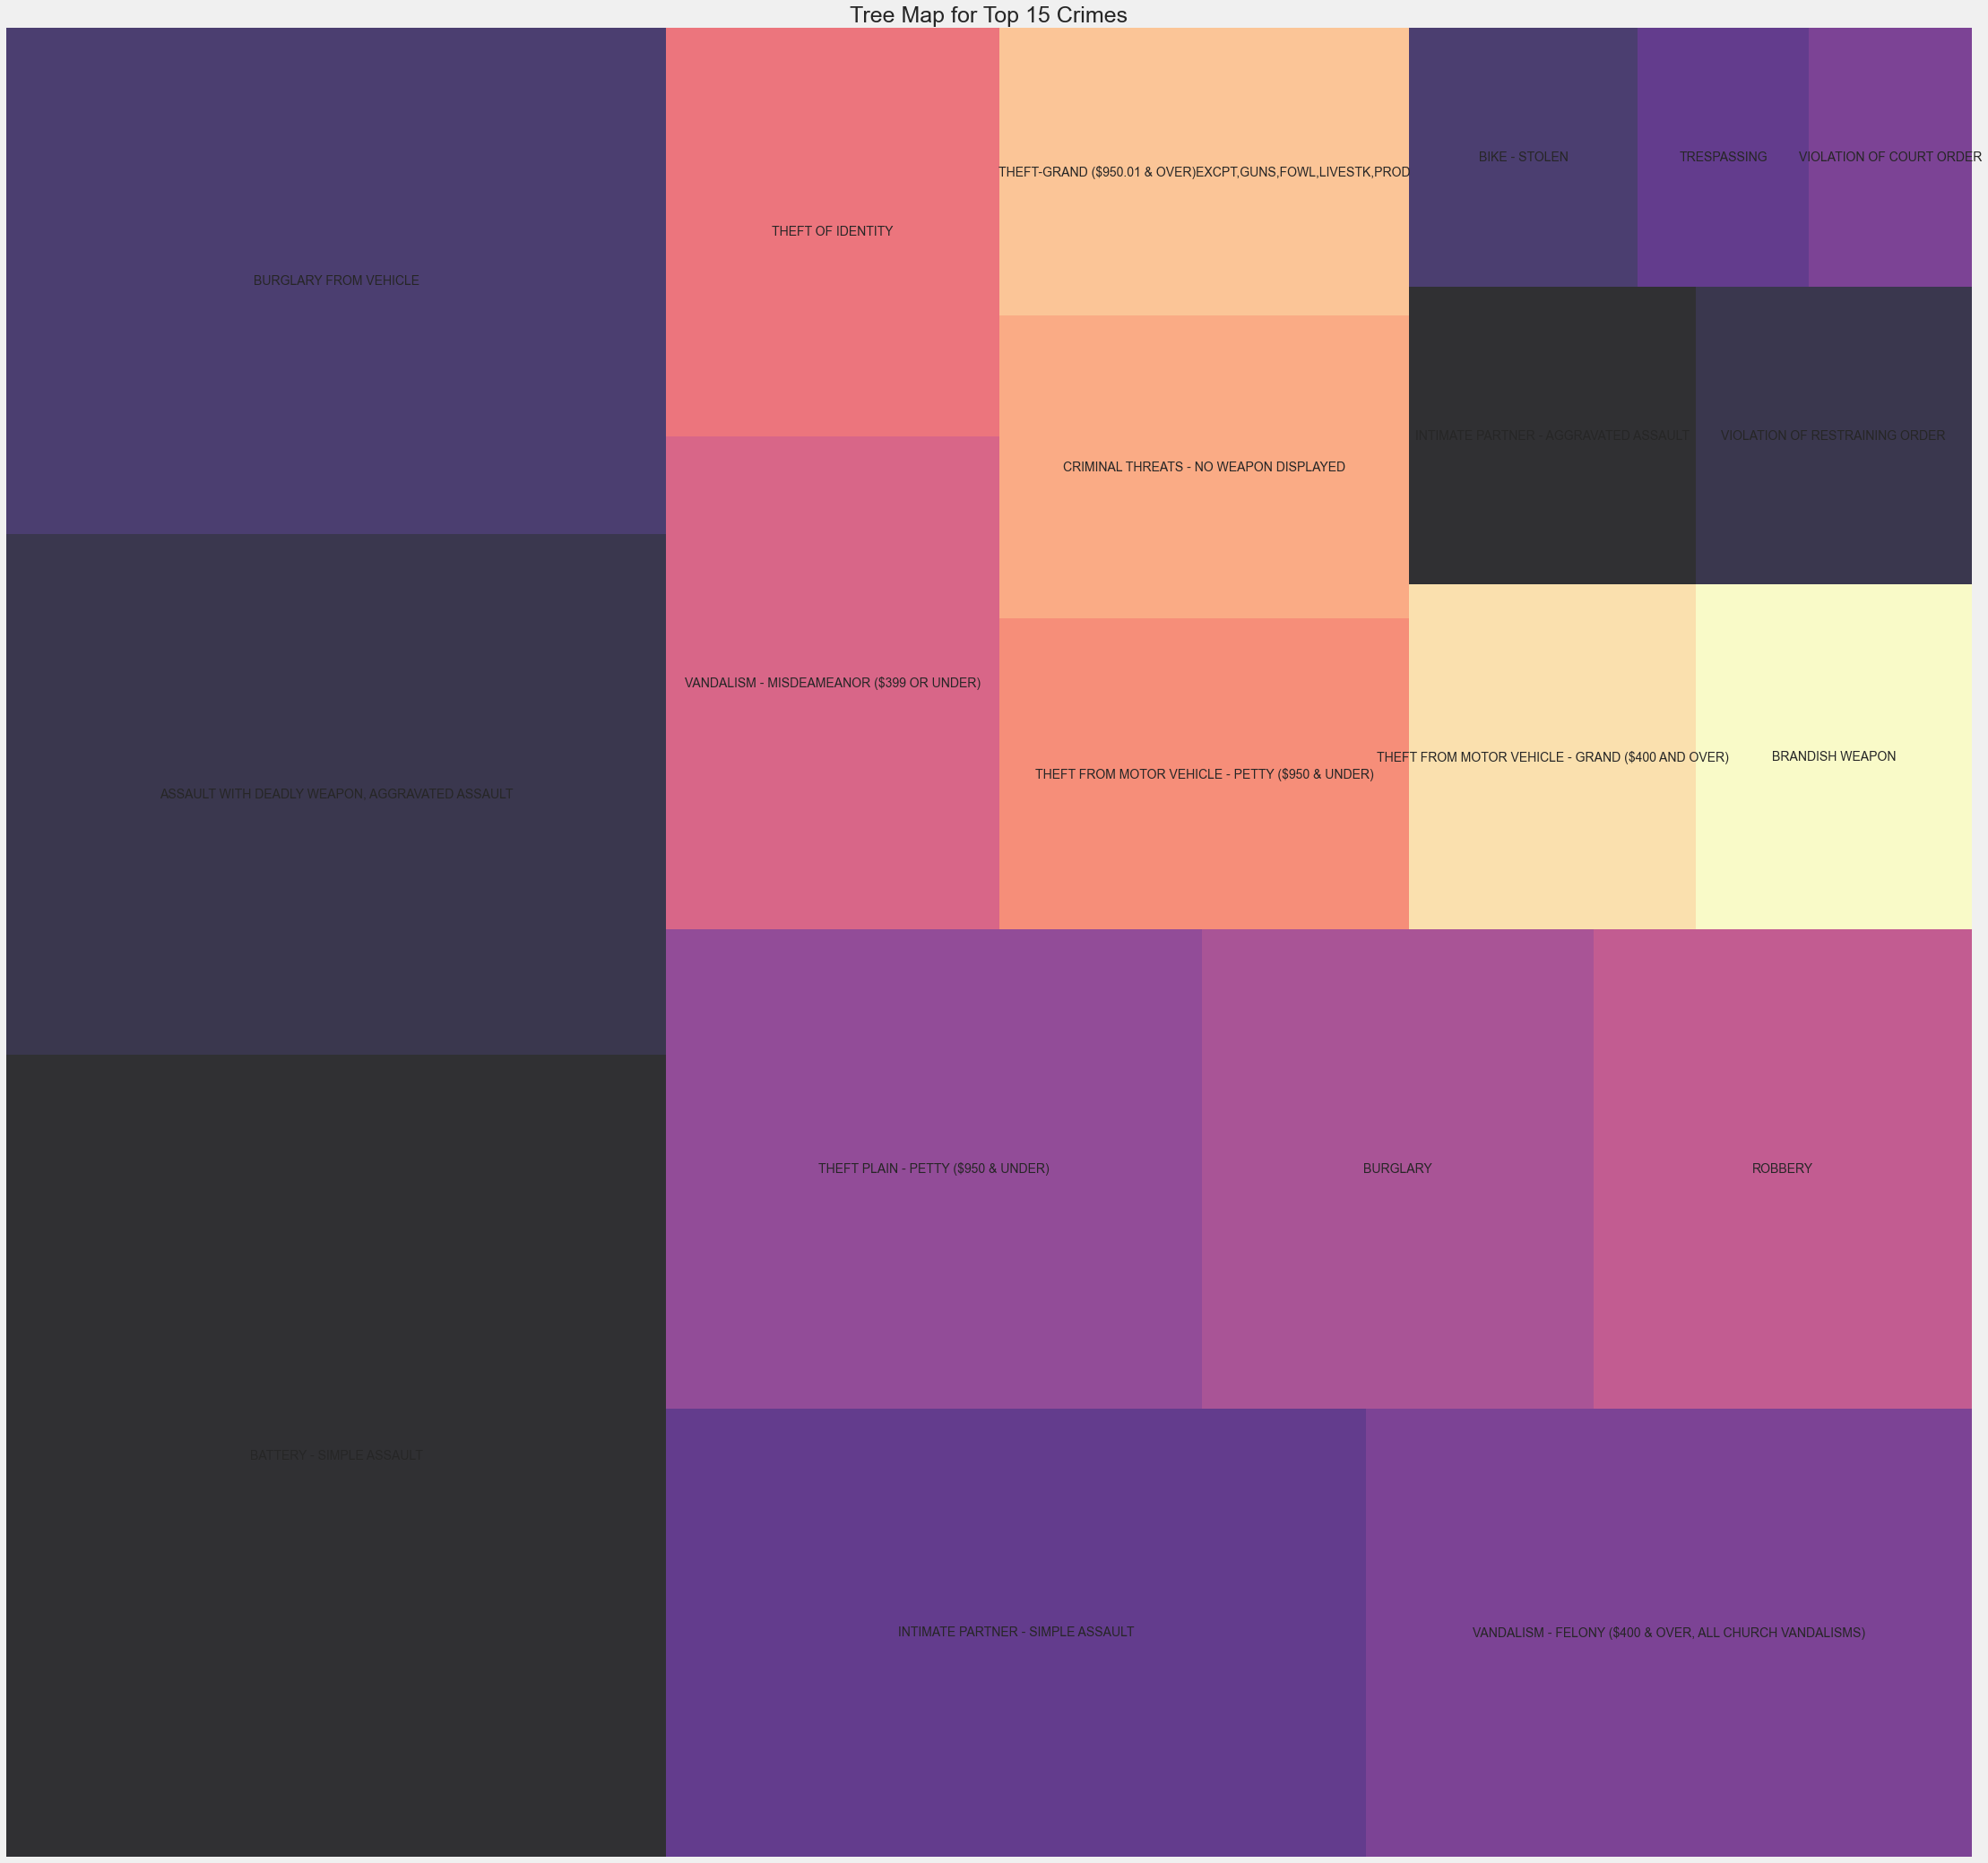

In [59]:
#Plotting a tree map
import numpy as np
y = df1['Crm Cd Desc'].value_counts().head(20)
    
plt.rcParams['figure.figsize'] = (35, 35)
plt.style.use('fivethirtyeight')
color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 15 Crimes', fontsize = 25)
plt.axis('off')
plt.show()

Here is the result of tree map for major type of crimes in Los Angeles

# Here we plotting number of crime cases held in a certain area

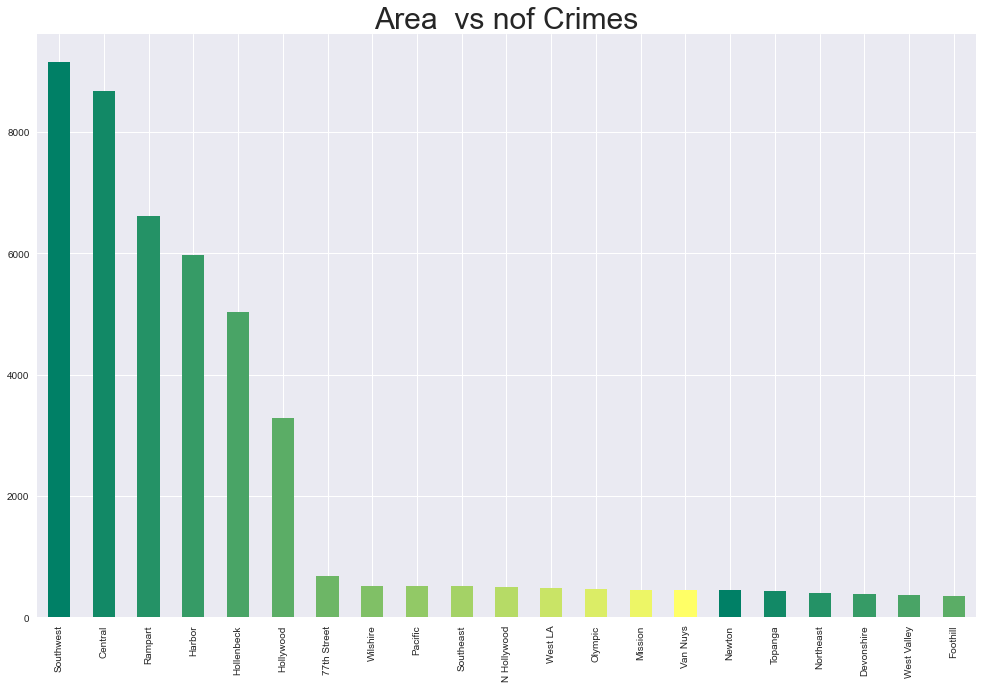

In [60]:
#Regions with count of crimes
plt.rcParams['figure.figsize'] = (25, 10)
plt.style.use('seaborn')
color = plt.cm.summer(np.linspace(0, 1, 15))
df1['AREA NAME'].value_counts().plot.bar(color = color, figsize = (15, 10))
plt.title('Area  vs nof Crimes',fontsize = 30)
plt.show()

The Los Angeles Police Department (LAPD) has a division for the police headquarters by networks, where gives general data and help, there are 21 topographical regions citywide According to the data frame, the communities where most crimes committed are:

Southwest Area, about 8700

Central Area, about 8400

Rampart, about 6300

harbor, about 6000

# Time the crime percentage is high

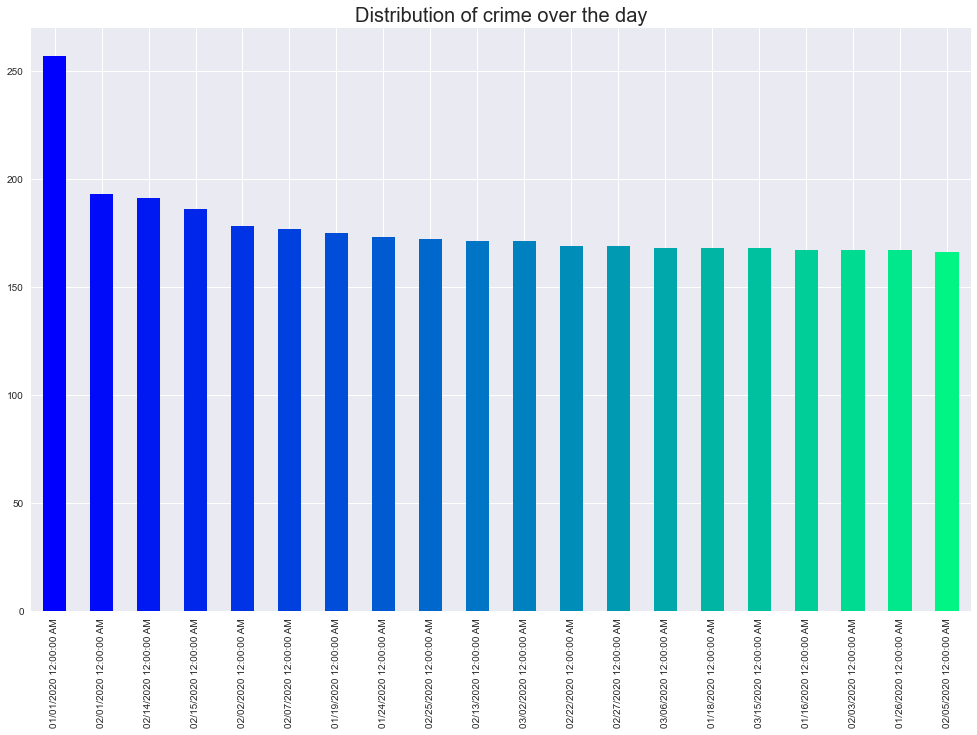

In [61]:
color = plt.cm.winter(np.linspace(0, 5, 100))
df1['DATE OCC'].value_counts().head(20).plot.bar(color = color, figsize = (15, 10))
plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

Time and date in which the crime percentage is high:

01/01/2020 12:00AM Above 250 crimes

02/14/2020 12:00AM 180 crimes

02/01/2020 12:00AM 190 crimes

# location where the high rate of Crime happend in Los Angles

Reference:https://www.geeksforgeeks.org/python-adding-markers-to-volcano-locations-using-folium-package/?ref=lbp

In [62]:
df2=df.groupby(['Crm Cd Desc']).first()

In [63]:
locations = df2[["LAT", "LON", "AREA NAME"]]

In [64]:
map = folium.Map(location1=[df2.LAT.mean(), df2.LON.mean()], zoom_start=30, control_scale=True)

In [65]:
for index, location_info in df2.iterrows():
    folium.Marker([location_info["LAT"], location_info["LON"]], popup=location_info["AREA NAME"]).add_to(map)

In [66]:
map

In the above map we can clearly see all the locations where the crime rate is high

# Feature Engineering

In [67]:
df1['Vict Sex']

0        F
1        M
2        F
3        X
4        F
        ..
60333    F
60334    M
60337    M
60338    M
60340    M
Name: Vict Sex, Length: 45726, dtype: object

In [68]:
# Assigning values to male and female 
df1['Vict Sex']=df1['Vict Sex'].str.replace('M','1') 
df1['Vict Sex']=df1['Vict Sex'].str.replace('F','0')

In [69]:
# Dropping unknown gender of the victim
df1.drop(df1.index[df1['Vict Sex'] == 'X'], inplace=True)


In [70]:
# Dropping unknown gender of the victim
df1.drop(df1.index[df1['Vict Sex'] == 'H'], inplace=True)


In [71]:
#value_counts()
df1['Vict Sex'].value_counts()

1    23152
0    21342
Name: Vict Sex, dtype: int64

Text(0, 0.5, 'Count of victim sex')

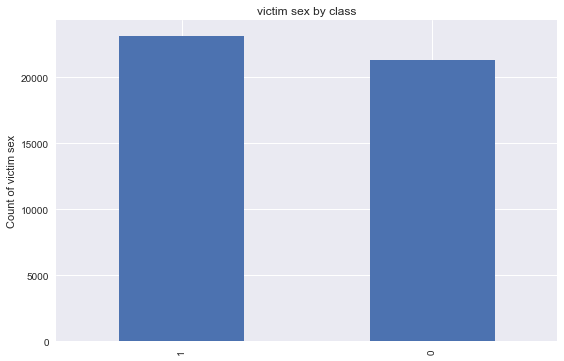

In [72]:
df1['Vict Sex'].value_counts().plot(kind='bar')
plt.title('victim sex by class')
plt.ylabel('Count of victim sex')

Now,we can see that classes are balanced

# Modeling and Classification

In [73]:
#importing libraries for classification
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
%matplotlib inline

# Splitting data for test-train split

Reference:https://github.com/appliedecon/data602-lectures/blob/main/regression/linear-regression-and-regularization.ipynb

In [74]:
from sklearn.model_selection import train_test_split
X = df1[[x for x in df1.columns if x != 'Vict Sex']]
y = df1['Vict Sex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 35595
Test examples: 8899

Feature names:
DR_NO	Date Rptd	DATE OCC	TIME OCC	AREA	AREA NAME	Rpt Dist No	Part 1-2	Crm Cd	Crm Cd Desc	Mocodes	Vict Age	Vict Descent	Premis Cd	Premis Desc	Weapon Used Cd	Weapon Desc	Status	Status Desc	Crm Cd 1	LOCATION	LAT	LON


This dataset has almost 44494 rows.So, we alteast need 80 % of the data for training.

In [75]:
features = [x for x in df1.columns if x != 'Vict Sex']
categoricallist = list(df1[features].select_dtypes(include=['object']).columns)
categoricallist

['Date Rptd',
 'DATE OCC',
 'AREA NAME',
 'Crm Cd Desc',
 'Mocodes',
 'Vict Descent',
 'Premis Desc',
 'Weapon Desc',
 'Status',
 'Status Desc',
 'LOCATION']

In [76]:
numericallist = list(df1.select_dtypes(exclude=['object']).columns)
numericallist

['DR_NO',
 'TIME OCC',
 'AREA',
 'Rpt Dist No',
 'Part 1-2',
 'Crm Cd',
 'Vict Age',
 'Premis Cd',
 'Weapon Used Cd',
 'Crm Cd 1',
 'LAT',
 'LON']

# Building pipelines

Reference:https://github.com/appliedecon/data602-lectures/blob/main/regression/linear-regression-and-regularization.ipynb

In [77]:
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='most_frequent')),('create_dummies_cats', OneHotEncoder(handle_unknown='ignore'))])
y = cat_pipeline.fit_transform(np.array(X_train[categoricallist]))
y.shape

(35595, 36597)

In [78]:
num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])
x = num_pipeline.fit_transform(np.array(X_train[numericallist]))
x.shape

(35595, 12)

In [79]:
processing_pipeline = ColumnTransformer(transformers=[('proc_numericlist', num_pipeline, numericallist),
                                                      ('create_dummies', cat_pipeline, categoricallist)])
z = processing_pipeline.fit_transform(X_train)
z

<35595x36609 sparse matrix of type '<class 'numpy.float64'>'
	with 818685 stored elements in Compressed Sparse Row format>

In [80]:
processing_pipeline

ColumnTransformer(transformers=[('proc_numericlist',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No',
                                  'Part 1-2', 'Crm Cd', 'Vict Age', 'Premis Cd',
                                  'Weapon Used Cd', 'Crm Cd 1', 'LAT', 'LON']),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('create_dummies_cats',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Dat

# Classification using KMEANS

Reference:https://github.com/appliedecon/data602-lectures/blob/main/unsupervised/clustering.ipynb

In [34]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

p1 = Pipeline([('process', processing_pipeline), 
              ('kmeans', KMeans(n_clusters=100)),
              ('model', LogisticRegression(max_iter=1000))
             ])

params = [{'kmeans__n_clusters':[2,5,8,4],'model__C': [0.01, 0.1, 1, 10],'model__penalty':['l2'], },{'kmeans__n_clusters':[2,5,8,4],'model__penalty':['none']}]

Component = GridSearchCV(p1, param_grid=params, scoring='accuracy', cv=10, refit=True)
Component = Component.fit(X_train, y_train)

Component.best_estimator_

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('proc_numericlist',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['DR_NO', 'TIME OCC', 'AREA',
                                                   'Rpt Dist No', 'Part 1-2',
                                                   'Crm Cd', 'Vict Age',
                                                   'Premis Cd',
                                                   'Weapon Used Cd', 'Crm Cd 1',
                                                   'LAT', 'LON']),
                                                 ('create_dummies',
                              

In [35]:
Component_score = Component.score(X_test, y_test)
print(f'k-means preprocesser: {Component_score:.2%}')

k-means preprocesser: 59.01%


In [36]:
from sklearn.metrics import classification_report
z_hat = Component.best_estimator_.predict(X_test)
print(classification_report(y_test, z_hat))

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      4186
           1       0.61      0.63      0.62      4713

    accuracy                           0.59      8899
   macro avg       0.59      0.59      0.59      8899
weighted avg       0.59      0.59      0.59      8899



# ROC-AUC Curve for KMEANS

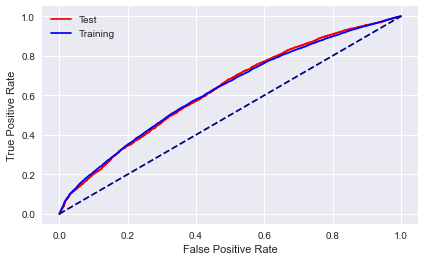

In [37]:
from sklearn.metrics import roc_curve

def generate_prob1(X_train, model=Component):
    return model.predict_proba(X_train)[:, 1]

def generate_roc(y, prob1):
    fpr, tpr, _ = roc_curve(y, prob1,pos_label='1')
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_prob1(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_prob1(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_prob1(X_test))

0.6270245082549624

Accuracy of 59% cannot be considered a good discrimination. I choose roc_auc_score as a metric to decide the model.
For this classifier, ROC_AUC score is 62% which has to be improved.

# Classification using Logistic Regression

Reference:https://github.com/appliedecon/data602-lectures/blob/main/dimension-reduction/dimension-reduction.ipynb

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


p = Pipeline([('process', processing_pipeline), 
              ('model', LogisticRegression(max_iter=1000))
             ])

params = [{'model__C': [0.01, 0.1, 1, 10],'model__penalty':['l2']},{'model__penalty':['none']}]

logistic = GridSearchCV(p, param_grid=params, scoring='accuracy', cv=10, refit=True)
logistic = logistic.fit(X_train, y_train)

logistic.best_estimator_

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('proc_numericlist',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['DR_NO', 'TIME OCC', 'AREA',
                                                   'Rpt Dist No', 'Part 1-2',
                                                   'Crm Cd', 'Vict Age',
                                                   'Premis Cd',
                                                   'Weapon Used Cd', 'Crm Cd 1',
                                                   'LAT', 'LON']),
                                                 ('create_dummies',
                              

In [40]:
y_hat = logistic.best_estimator_.predict(X_test)

In [41]:
print(f'Validation score: {logistic.best_score_:.2%}')
print(f'Test score: {logistic.score(X_test, y_test):.2%}')

Validation score: 63.53%
Test score: 63.95%


In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.63      0.56      0.59      4186
           1       0.65      0.71      0.68      4713

    accuracy                           0.64      8899
   macro avg       0.64      0.64      0.63      8899
weighted avg       0.64      0.64      0.64      8899



# ROC-AUC Curve for LogisticRegression

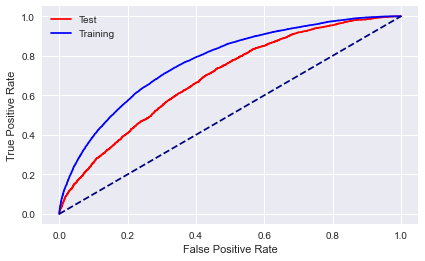

In [43]:
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize


def generate_probs(X_train, model=logistic):
    return model.predict_proba(X_train)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs,pos_label='1')
    return fpr, tpr
    

fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))


plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [44]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_probs(X_test))

0.6899449824615187

Accuracy of 64% can be considered a good discrimination. I choose roc_auc_score as a metric to decide the model.
For this classifier, ROC_AUC score is 69% which is better than kmeans.

# Classification using Decision Tree

Reference:https://github.com/appliedecon/data602-lectures/blob/main/trees/trees.ipynb

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

modeling_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('dt', DecisionTreeClassifier())]
)

param_grid = [
  {'dt__max_depth': [3, 5, 6, 8,10],
   'dt__min_samples_split':[2,4,6,8],
   'dt__min_samples_leaf': [3, 7],
   'dt__class_weight':[None, 'balanced']
  }
 ]

gcv_results = GridSearchCV(estimator=modeling_pipeline, 
                           param_grid=param_grid, scoring='accuracy', refit=True)

gcv_results = gcv_results.fit(X_train, y_train)

gcv_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numericlist',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['DR_NO', 'TIME OCC', 'AREA',
                                                   'Rpt Dist No', 'Part 1-2',
                                                   'Crm Cd', 'Vict Age',
                                                   'Premis Cd',
                                                   'Weapon Used Cd', 'Crm Cd 1',
                                                   'LAT', 'LON']),
                                                 ('create_dummies',
                      

In [46]:
y_testp = gcv_results.predict(X_test)
y_testp_dt = gcv_results.predict_proba(X_test)

print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.64      0.51      0.57      4186
           1       0.63      0.75      0.69      4713

    accuracy                           0.64      8899
   macro avg       0.64      0.63      0.63      8899
weighted avg       0.64      0.64      0.63      8899



# ROC-AUC Curve for Decision Tree

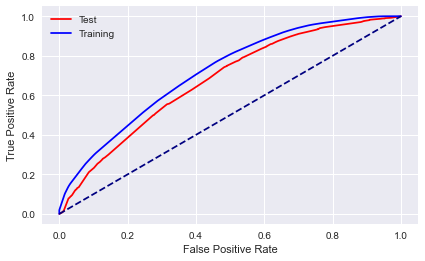

In [47]:
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize


def generate_prob(X_train, model=gcv_results):
    return model.predict_proba(X_train)[:, 1]

def generate_roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob,pos_label='1')
    return fpr, tpr
    

fpr_test, tpr_test = generate_roc(y_test, generate_prob(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_prob(X_train))


plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_prob(X_test))

0.6744704570791527

Accuracy of 64% can be considered a good discrimination. I choose roc_auc_score as a metric to decide the model.
For this classifier, ROC_AUC score is 67% which is better than kmeans.

# Classification using K-Nearest Neighbors Classifier

Reference:https://github.com/appliedecon/data602-lectures/blob/main/supervised-algorithms/knn-nb-svm.ipynb

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

knn_m = modeling_pipeline = Pipeline([('data_processing', processing_pipeline),
                                       ('model', KNeighborsClassifier())])


param_grid = [
  {'model__n_neighbors': [ 4, 8, 10], 'model__weights': ['uniform']}
 ]

knn_results = GridSearchCV(estimator=knn_m, param_grid=param_grid, scoring='accuracy', refit=True, cv=5)
knn_results = knn_results.fit(X_train, y_train)



In [36]:
knn_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numericlist',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['DR_NO', 'TIME OCC', 'AREA',
                                                   'Rpt Dist No', 'Part 1-2',
                                                   'Crm Cd', 'Vict Age',
                                                   'Premis Cd',
                                                   'Weapon Used Cd', 'Crm Cd 1',
                                                   'LAT', 'LON']),
                                                 ('create_dummies',
                      

In [37]:
knn_score = knn_results.score(X_test, y_test)

In [38]:
print(f'k-Nearest Neighbor Score: {knn_score:.2%}')

k-Nearest Neighbor Score: 59.55%


In [40]:
from sklearn.metrics import classification_report
y_testp = knn_results.predict(X_test)
y_testp_dt = knn_results.predict_proba(X_test)

print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.56      0.65      0.60      4186
           1       0.64      0.54      0.59      4713

    accuracy                           0.60      8899
   macro avg       0.60      0.60      0.60      8899
weighted avg       0.60      0.60      0.59      8899



# ROC-AUC Curve for K-Nearest Neighbors

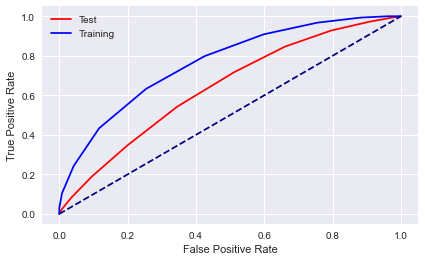

In [41]:
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize


def generate_prob4(X_train, model=knn_results):
    return model.predict_proba(X_train)[:, 1]

def generate_roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob,pos_label='1')
    return fpr, tpr
    

fpr_test, tpr_test = generate_roc(y_test, generate_prob4(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_prob4(X_train))


plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_prob4(X_test))

0.6409677048843463

Accuracy of 60% cannot be considered a good discrimination. I choose roc_auc_score as a metric to decide the model.
For this classifier, ROC_AUC score is 64% which has to be improved

# Classification using Random Forest

Reference:https://github.com/appliedecon/data602-lectures/blob/main/trees/trees.ipynb

In [81]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier



rf_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('rf', RandomForestClassifier())]
)

param_grid = [{'rf__max_depth': [5, 8, 10],
               'rf__n_estimators': [10, 50],
               'rf__class_weight': [ 'balanced', 'balanced_subsample'],
               'rf__max_samples': [878]
              }]

rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='recall', refit=True)
rf_results = rf_results.fit(X_train, y_train)
rf_yhat = rf_results.predict(X_test)

rf_results.best_estimator_

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numericlist',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['DR_NO', 'TIME OCC', 'AREA',
                                                   'Rpt Dist No', 'Part 1-2',
                                                   'Crm Cd', 'Vict Age',
                                                   'Premis Cd',
                                                   'Weapon Used Cd', 'Crm Cd 1',
                                                   'LAT', 'LON']),
                                                 ('create_dummies',
                      

In [82]:
y_testp = rf_results.predict(X_test)
y_testp_rf = rf_results.predict_proba(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56      4186
           1       0.61      0.62      0.62      4713

    accuracy                           0.59      8899
   macro avg       0.59      0.59      0.59      8899
weighted avg       0.59      0.59      0.59      8899



# ROC-AUC Curve for Random Forest

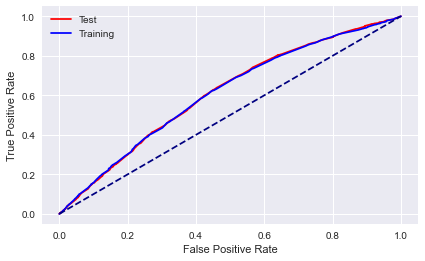

In [83]:
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize


def generate_prob5(X_train, model=rf_results):
    return model.predict_proba(X_train)[:, 1]

def generate_roc(y, prob):
    fpr, tpr, _ = roc_curve(y, prob,pos_label='1')
    return fpr, tpr
    

fpr_test, tpr_test = generate_roc(y_test, generate_prob5(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_prob5(X_train))


plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

In [84]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, generate_prob5(X_test))

0.6103182696324699

Accuracy of 59% cannot be considered a good discrimination. I choose roc_auc_score as a metric to decide the model.
For this classifier, ROC_AUC score is 61% which has to be improved